In [3]:
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans
import numpy as np

In [4]:
img = cv2.imread("kidsphoto.jpeg")

img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img = cv2.resize(img,(306,382))
print(img.shape)

(382, 306, 3)


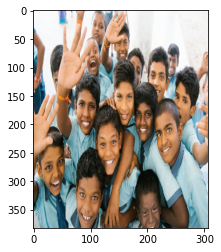

In [5]:
plt.imshow(img)
plt.show()

In [6]:
X = img.reshape((-1,3))
print(X.shape)

(116892, 3)


In [7]:
# 4 dominant colors
k = 10
model = KMeans(n_clusters=k)
model.fit(X)

KMeans(n_clusters=10)

In [8]:
centroids = model.cluster_centers_

In [9]:
print(centroids)

[[ 31.67840654  30.31981269  23.44789606]
 [198.62391104 139.17494157  96.05064098]
 [245.05000827 244.78447373 244.95203176]
 [ 87.4236773  126.19781738 137.95482801]
 [193.49346867 210.62533098 213.73556929]
 [136.88012757 174.23545585 184.17485978]
 [100.15673101  69.30232163  47.13836211]
 [228.71861393 177.37735849 144.4058418 ]
 [155.70756218 104.45909053  69.97897998]
 [ 45.31066591  65.68016366  71.13346501]]


In [10]:
colors = np.array(centroids, dtype='uint8')

In [11]:
print(colors)

[[ 31  30  23]
 [198 139  96]
 [245 244 244]
 [ 87 126 137]
 [193 210 213]
 [136 174 184]
 [100  69  47]
 [228 177 144]
 [155 104  69]
 [ 45  65  71]]


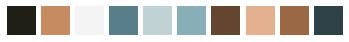

In [13]:
# Color Patch (100,100,3) -> Red Color
i=1
for color in colors:
    plt.subplot(1,k,i)
    plt.axis("off")
    i = i+1
    mat = np.zeros((100,100,3),dtype='uint8')
    mat[:,:,:] = color
    plt.imshow(mat)
    
plt.show()

In [15]:
print(colors)

[[ 31  30  23]
 [198 139  96]
 [245 244 244]
 [ 87 126 137]
 [193 210 213]
 [136 174 184]
 [100  69  47]
 [228 177 144]
 [155 104  69]
 [ 45  65  71]]


In [16]:
np.unique(model.labels_)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)

In [18]:
model.labels_.shape

(116892,)

In [21]:
newImage= np.zeros((X.shape))
print(newImage.shape)

(116892, 3)


In [27]:
for i in range(newImage.shape[0]):
    newImage[i] = colors[model.labels_[i]]

In [28]:
newImage = newImage.reshape(img.shape)

In [29]:
print(newImage.shape)

(382, 306, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


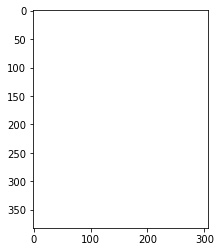

In [38]:
plt.imshow(newImage)